# Ashutosh Sahoo , Week-7

In [5]:
# lets import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [8]:
# load data set
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [9]:
#view of data
print(train_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [10]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
print(train_df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [12]:
#check for missing values
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_11048\3518469251.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')


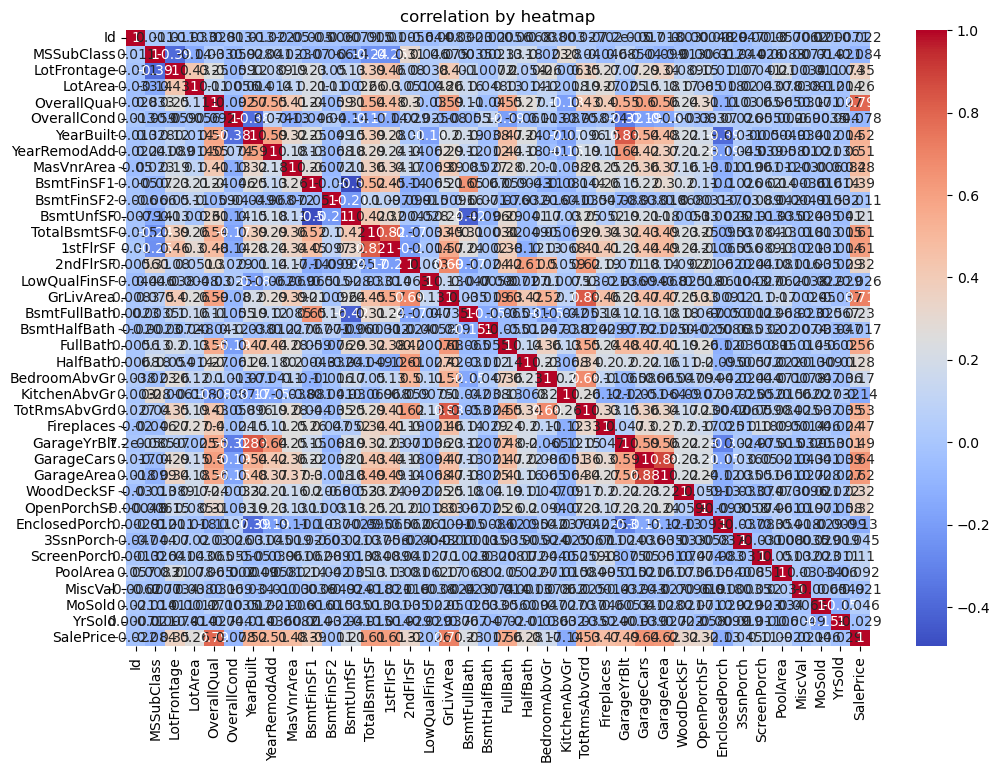

In [20]:
# corelation check by heat-map
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('correlation by heatmap')
plt.show()

In [21]:
# preporcess the data to fill missing values
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
for col in train_df.select_dtypes(include=['number']).columns:
    train_df[col].fillna(train_df[col].mean(), inplace=True)

for col in test_df.select_dtypes(include=['object']).columns:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)
for col in test_df.select_dtypes(include=['number']).columns:
    test_df[col].fillna(test_df[col].mean(), inplace=True)

In [22]:
# seregrating targt
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Select only numeric columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

# Standardize numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_val_scaled = scaler.transform(X_val[numeric_cols])
test_df_scaled = scaler.transform(test_df[numeric_cols])

In [25]:
# lets make the mode now 
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
# evaluation the model
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

In [29]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

In [30]:
print(f'trng RMSE: {train_rmse}')
print(f'valid RMSE: {val_rmse}')
print(f'trng R2: {train_r2}')
print(f'valid R2: {val_r2}')

trng RMSE: 33913.02563391416
valid RMSE: 36862.906237756615
trng R2: 0.8071785408088427
valid R2: 0.8228401479169992


In [31]:
# prediction
test_predictions = model.predict(test_df_scaled)

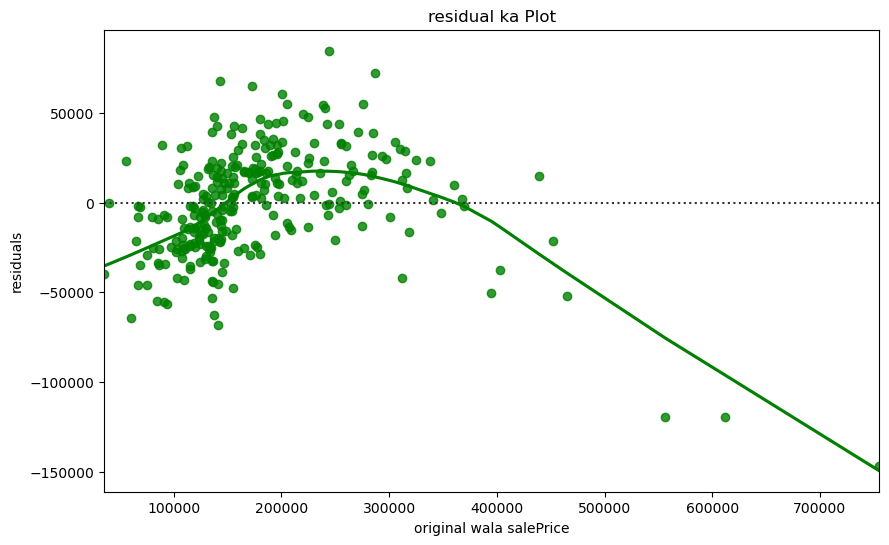

In [32]:
# visualise the data
plt.figure(figsize=(10, 6))
sns.residplot(x=y_val, y=y_val_pred, lowess=True, color='g')
plt.xlabel('original wala salePrice')
plt.ylabel('residuals')
plt.title('residual ka Plot')
plt.show()

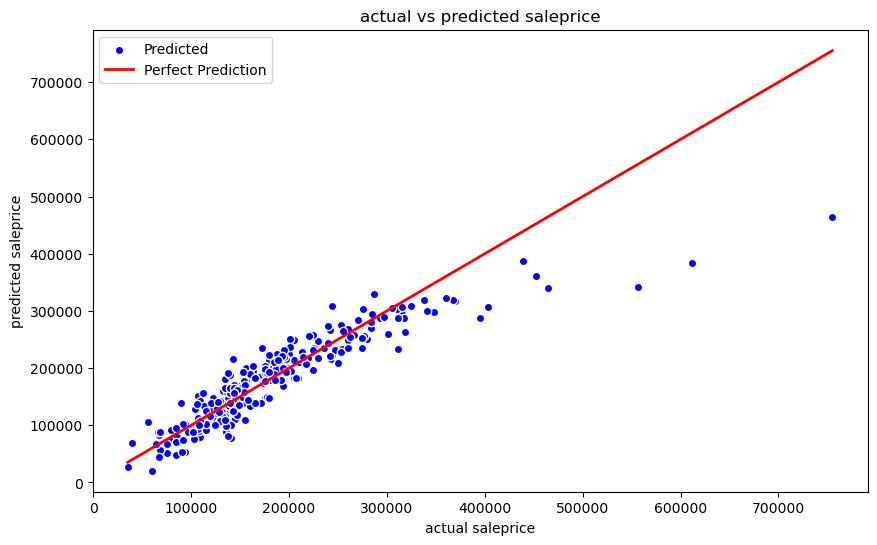

In [33]:
# ploting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, c='blue', marker='o', edgecolor='white', label='Predicted')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('actual saleprice')
plt.ylabel('predicted saleprice')
plt.title('actual vs predicted saleprice')
plt.legend()
plt.show()